# Chaines de Markov – chaines de Markov cachées

## Partie 1

In [3]:
import pomegranate
print(pomegranate.__version__)
# It should say 0.15.0 or 0.14.9 (NOT 1.0.0)

0.15.0


In [4]:
import os
import sys
import matplotlib.pyplot as plt
from pomegranate import DiscreteDistribution, HiddenMarkovModel, State

base_path = os.path.abspath(".")
subfolder_path = os.path.join(base_path, "Exercices 1 et 2")

from duree import duree



ModuleNotFoundError: No module named 'duree'

### Question 1/2/3 : sur feuille

### Question 4

In [ ]:
gamma = 0.9
alpha = 0.65
beta = 0.02
Nsamples = 10000

start_probability = np.array([gamma, 1-gamma])

T = [
    [1-beta, beta],
    [1-alpha, alpha]
]

B = [
    {0: 1.0, 1: 0.0},
    {0: 0.0, 1: 1.0}
]

d0 = DiscreteDistribution(B[0])
d1 = DiscreteDistribution(B[1])
s0 = State(d0, name="Sec")
s1 = State(d1, name="Pluie")

model = HiddenMarkovModel("Meteo")
model.add_states(s0, s1)
model.add_transition(model.start, s0, start_probability[0])
model.add_transition(model.start, s1, start_probability[1])
model.add_transition(s0, s0, T[0][0])
model.add_transition(s0, s1, T[0][1])
model.add_transition(s1, s0, T[1][0])
model.add_transition(s1, s1, T[1][1])
model.bake()

obsSeq, statesSeq = model.sample(length=Nsamples, path=True)
obsSeq = np.array(obsSeq, dtype=object).squeeze()

C:\Users\tangu\AppData\Local\Temp\ipykernel_29856\772585142.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obsSeq, statesSeq = model.sample(length=Nsamples, path=True)


In [ ]:
# CALCULS ET AFFICHAGES

# --- Question 4 ---
P_E1_empirique = np.mean(obsSeq == 1)
P_E1_theorique = beta / (1 + beta - alpha)

print(f"\n--- Question 4 : Probabilité Stationnaire ---")
print(f"Théorique : {P_E1_theorique:.4f}")
print(f"Empirique : {P_E1_empirique:.4f}")



--- Question 4 : Probabilité Stationnaire ---
Théorique : 0.0541
Empirique : 0.0598


### Question 5

In [ ]:
p_geo = 1 - alpha
q_geo = alpha
E_theo = 1 / p_geo
V_theo = q_geo / (p_geo**2)

dSecSim, dPluieSim, pdfSecSim, pdfPluieSim, binsSecSim, binsPluieSim = duree(obsSeq)
E_sim = np.mean(np.array(dPluieSim))
V_sim = np.var(np.array(dPluieSim))

print(f"\n--- Question 5 : Validation Simulation (Interne) ---")
print(f"Moyenne E[D] -> Théorique: {E_theo:.3f} | Simulation: {E_sim:.3f}")
print(f"Variance V[D] -> Théorique: {V_theo:.3f} | Simulation: {V_sim:.3f}")



--- Question 5 : Validation Simulation (Interne) ---
Moyenne E[D] -> Théorique: 2.857 | Simulation: 2.975
Variance V[D] -> Théorique: 5.306 | Simulation: 5.457


### Question 6 / 7

In [ ]:
import numpy as np
import scipy.io as mio
import os

# --- 1. CHARGEMENT ET NETTOYAGE DES DONNÉES ---
try:
    # Construction du chemin
    file_path = os.path.join('Exercices 1 et 2', 'RR5MN.mat')
    
    # Chargement
    data = mio.loadmat(file_path)
    
    # Inspection des données brutes AVANT modification
    raw_support = data['Support'].squeeze()
    valeurs_uniques = np.unique(raw_support)
    
    # --- CORRECTION INTELLIGENTE (évite l'erreur du -1) ---
    if np.array_equal(valeurs_uniques, [1, 2]):
        print(f"Format détecté : [1, 2]. Application de la correction (-1).")
        ObsMesure = raw_support.astype(np.int8) - 1
    elif np.array_equal(valeurs_uniques, [0, 1]):
        print(f"Format détecté : [0, 1]. Pas de correction nécessaire.")
        ObsMesure = raw_support.astype(np.int8)
    else:
        print(f"ATTENTION : Valeurs inattendues {valeurs_uniques}. Vérifiez le fichier.")
        ObsMesure = raw_support.astype(np.int8)

    # Calcul des durées (Appel de votre fonction)
    # Assurez-vous que la fonction duree() est bien définie plus haut
    dSecMes, dPluieMes, pdfSecMes, pdfPluieMes, binsSecMes, binsPluieMes = duree(ObsMesure)
    print(f"Fichier 'RR5MN.mat' chargé avec succès ({len(ObsMesure)} mesures).")

except FileNotFoundError:
    print(f"\nERREUR : Le fichier est introuvable à l'emplacement : {os.path.join('Exercices 1 et 2', 'RR5MN.mat')}")
    # Initialisation par défaut pour éviter que le code plante après
    ObsMesure = np.zeros(100)
    dSecMes, dPluieMes = [], []
    binsSecMes, pdfSecMes = np.zeros(10), np.zeros(9)
    binsPluieMes, pdfPluieMes = np.arange(10), np.zeros(9)


# --- Question 6 (PLUIE) ---
if len(dPluieMes) > 0:
    dPluie_reelle = np.array(dPluieMes)
    E_reelle = np.mean(dPluie_reelle)
    V_reelle = np.var(dPluie_reelle)
else:
    E_reelle, V_reelle = 0, 0

# Assurez-vous que E_sim et V_sim sont calculés avant ce bloc
# Si ce n'est pas le cas, commentez les lignes d'affichage correspondantes
print("\n" + "="*60)
print("QUESTION 6 : COMPARAISON SIMULATION vs RÉALITÉ (PLUIE)")
print("="*60)
# J'utilise des try/except ici au cas où E_sim n'est pas défini
try:
    print(f"{'Statistique':<20} | {'Simulation':<15} | {'Mesures Réelles':<15}")
    print("-" * 60)
    print(f"{'Moyenne E[D]':<20} | {E_sim:<15.3f} | {E_reelle:<15.3f}")
    print(f"{'Variance V[D]':<20} | {V_sim:<15.3f} | {V_reelle:<15.3f}")
except NameError:
    print("Note : E_sim et V_sim ne sont pas définis, affichage des réels uniquement.")
    print(f"Moyenne Réelle: {E_reelle:.3f}, Variance Réelle: {V_reelle:.3f}")
print("-" * 60)


# --- Question 7 (SÉCHERESSE) ---
# Note : 'beta' doit être défini précédemment dans votre code
if 'beta' not in locals():
    print("\nATTENTION : 'beta' n'est pas défini. Utilisation d'une valeur par défaut 0.5 pour l'exemple.")
    beta = 0.5 

p_sec = beta
q_sec = 1 - beta
E_sec_theo = 1 / p_sec
V_sec_theo = q_sec / (p_sec**2)

if len(dSecMes) > 0:
    dSec_reelle = np.array(dSecMes)
    E_sec_reel = np.mean(dSec_reelle)
    V_sec_reel = np.var(dSec_reelle)
    
    # --- DIAGNOSTIC DE VARIANCE ---
    # C'est ici qu'on vérifie pourquoi la variance est élevée
    max_sec = np.max(dSec_reelle)
    min_sec = np.min(dSec_reelle)
else:
    E_sec_reel, V_sec_reel = 0, 0
    max_sec, min_sec = 0, 0

print("\n" + "="*60)
print("QUESTION 7 : PÉRIODES SÈCHES (Modèle vs Réalité)")
print("="*60)
print(f"{'Statistique':<20} | {'Modèle (Théo)':<15} | {'Mesures Réelles':<15}")
print("-" * 60)
print(f"{'Moyenne E[D]':<20} | {E_sec_theo:<15.3f} | {E_sec_reel:<15.3f}")
print(f"{'Variance V[D]':<20} | {V_sec_theo:<15.3f} | {V_sec_reel:<15.3f}")
print("-" * 60)

# --- DEBUGGING DE LA VARIANCE ---
print(f"\n--- ANALYSE DE LA VARIANCE ÉLEVÉE (SÉCHERESSE) ---")
print(f"Durée minimale observée : {min_sec}")
print(f"Durée maximale observée : {max_sec}")
if V_sec_reel > 10 * V_sec_theo:
    print("=> La variance est très élevée. C'est souvent normal en hydrologie.")
    print("   Le modèle géométrique sous-estime les très longues périodes sans pluie.")
    print(f"   Une seule valeur de {max_sec} suffit à faire exploser la variance.")

Format détecté : [1, 2]. Application de la correction (-1).


NameError: name 'duree' is not defined

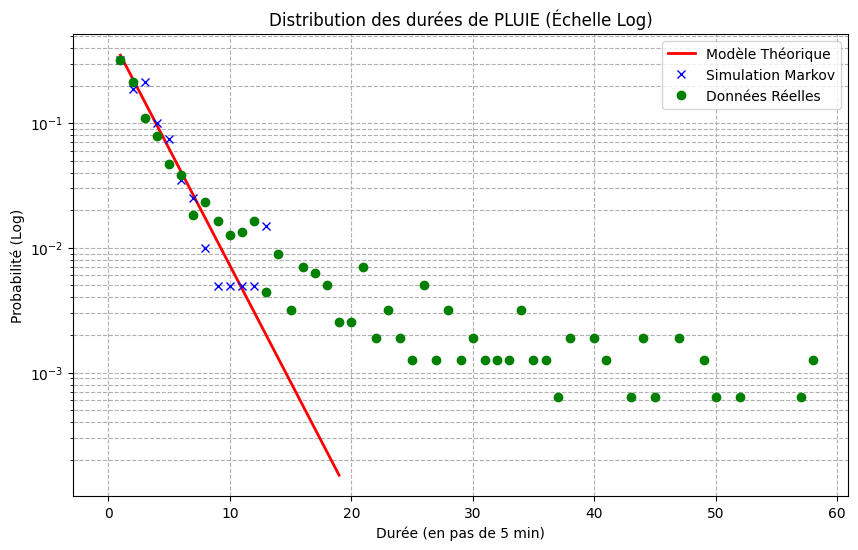

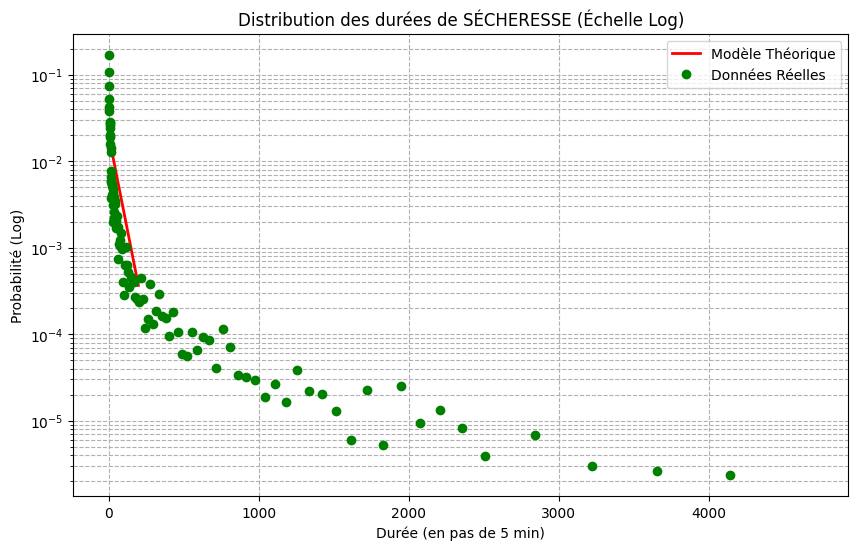

In [ ]:
# Graphique Q6 (Pluie)
plt.figure(figsize=(10, 6))
x_vals = np.arange(1, 20)
y_theo = (1-alpha) * (alpha**(x_vals-1))
plt.semilogy(x_vals, y_theo, 'r-', linewidth=2, label='Modèle Théorique')
plt.semilogy(binsPluieSim[:-1], pdfPluieSim, 'bx', label='Simulation Markov')
if len(binsPluieMes) > 1:
    plt.semilogy(binsPluieMes[:-1], pdfPluieMes, 'go', label='Données Réelles')
plt.title('Distribution des durées de PLUIE (Échelle Log)')
plt.xlabel('Durée (en pas de 5 min)')
plt.ylabel('Probabilité (Log)')
plt.legend()
plt.grid(True, which="both", ls="--")

# Graphique Q7 (Sècheresse)
plt.figure(figsize=(10, 6))
x_vals_sec = np.arange(1, 200)
y_theo_sec = p_sec * (q_sec**(x_vals_sec-1))
plt.semilogy(x_vals_sec, y_theo_sec, 'r-', lw=2, label='Modèle Théorique')
if len(binsSecMes) > 1:
    plt.semilogy(binsSecMes[:-1], pdfSecMes, 'go', label='Données Réelles')
plt.title('Distribution des durées de SÉCHERESSE (Échelle Log)')
plt.xlabel('Durée (en pas de 5 min)')
plt.ylabel('Probabilité (Log)')
plt.legend()
plt.grid(True, which="both", ls="--")

# Affichage final des deux fenêtres
plt.show()

## Partie 2

### Question 

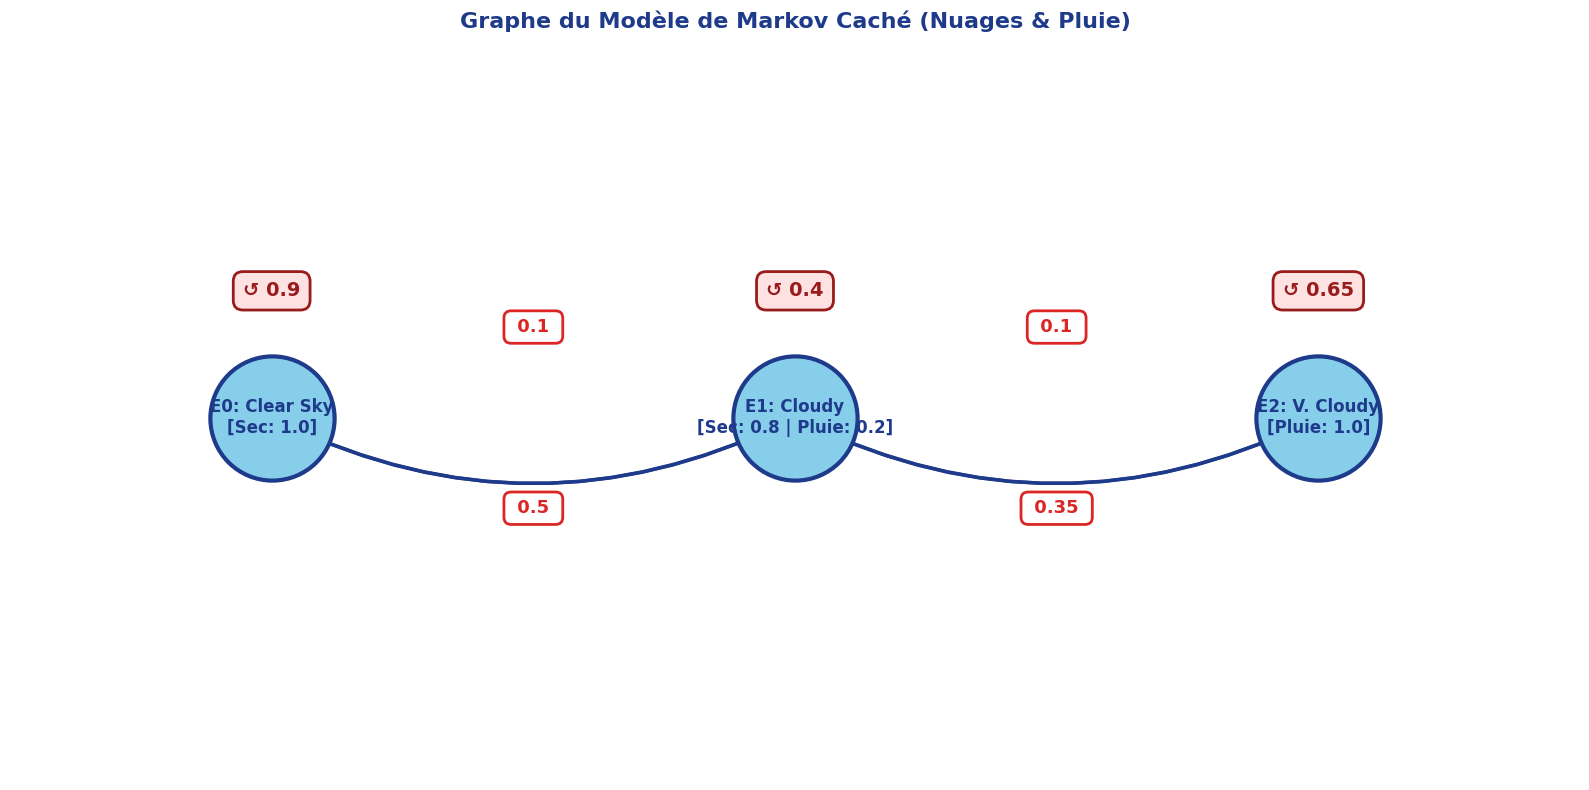

In [ ]:
# --- Question 1 : Représentation du Graphe HMM ---
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

# 1. Création du graphe orienté
G = nx.DiGraph()

# 2. Définition des états (Nœuds) et des observations (Émissions)
states = {
    'E0': 'E0: Clear Sky\n[Sec: 1.0]',
    'E1': 'E1: Cloudy\n[Sec: 0.8 | Pluie: 0.2]',
    'E2': 'E2: V. Cloudy\n[Pluie: 1.0]'
}
G.add_nodes_from(states.keys())

# 3. Définition des transitions (Matrice T)
transitions = [
    ('E0', 'E0', 0.9), ('E0', 'E1', 0.1),
    ('E1', 'E0', 0.5), ('E1', 'E1', 0.4), ('E1', 'E2', 0.1),
    ('E2', 'E1', 0.35), ('E2', 'E2', 0.65)
]

for u, v, p in transitions:
    if u != v:
        G.add_edge(u, v, weight=p)

# 4. Positionnement des nœuds (plus espacés)
pos = {'E0': (-2, 0), 'E1': (0, 0), 'E2': (2, 0)}

# --- DESSIN ---
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')

# Nœuds avec bordure plus visible
nx.draw_networkx_nodes(G, pos, node_size=8000, node_color='#87CEEB', 
                       edgecolors='#1E3A8A', linewidths=3, ax=ax)

# Labels des nœuds avec meilleur contraste
nx.draw_networkx_labels(G, pos, labels=states, font_size=12, 
                        font_weight='bold', font_color='#1E3A8A', ax=ax)

# Arêtes (Transitions entre états)
for (u, v, p) in transitions:
    if u != v:
        # Courbure adaptée
        rad = 0.25
        style = f"arc3,rad={rad}" if u < v else f"arc3,rad=-{rad}"
        
        # Dessiner l'arête
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], 
                              connectionstyle=style,
                              arrowstyle='-|>', arrowsize=25, 
                              width=2.5, edge_color='#1E3A8A',
                              ax=ax)
        
        # Étiquette de probabilité sur la flèche (encadrée)
        x_lbl = (pos[u][0] + pos[v][0]) / 2
        y_lbl = (pos[u][1] + pos[v][1]) / 2 + (0.25 if u < v else -0.25)
        
        # Fond blanc pour les labels
        ax.text(x_lbl, y_lbl, f" {p} ", 
               ha='center', va='center',
               color='#DC2626', fontweight='bold', fontsize=13,
               bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                        edgecolor='#DC2626', linewidth=2))

# Boucles (Self-loops) avec fond
loop_data = [
    (-2, 0.35, "↺ 0.9"),
    (0, 0.35, "↺ 0.4"),
    (2, 0.35, "↺ 0.65")
]

for x, y, text in loop_data:
    ax.text(x, y, text, ha='center', va='center',
           color='#991B1B', fontsize=14, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='#FEE2E2', 
                    edgecolor='#991B1B', linewidth=2))

# Titre avec style
ax.set_title("Graphe du Modèle de Markov Caché (Nuages & Pluie)", 
            fontsize=16, fontweight='bold', pad=20, color='#1E3A8A')

ax.axis('off')
ax.set_xlim(-3, 3)
ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()

C:\Users\tangu\AppData\Local\Temp\ipykernel_29856\2769107409.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obsSeq, _ = hmm.sample(length=Nsamples, path=True)


Données réelles chargées : 219168 points.

RÉSULTATS Q2 : COMPARAISON HMM vs RÉALITÉ
Métrique                  | HMM (Simu)      | Réalité        
----------------------------------------------------------------------
% Global Pluie            | 8.05          % | 4.19          %
----------------------------------------------------------------------
Pluie - Moyenne E[D]      | 1.978           | 5.758          
Pluie - Variance V[D]     | 3.702           | 108.276        
----------------------------------------------------------------------
Sec - Moyenne E[D]        | 22.618          | 124.715        
Sec - Variance V[D]       | 572.842         | 195978.048     


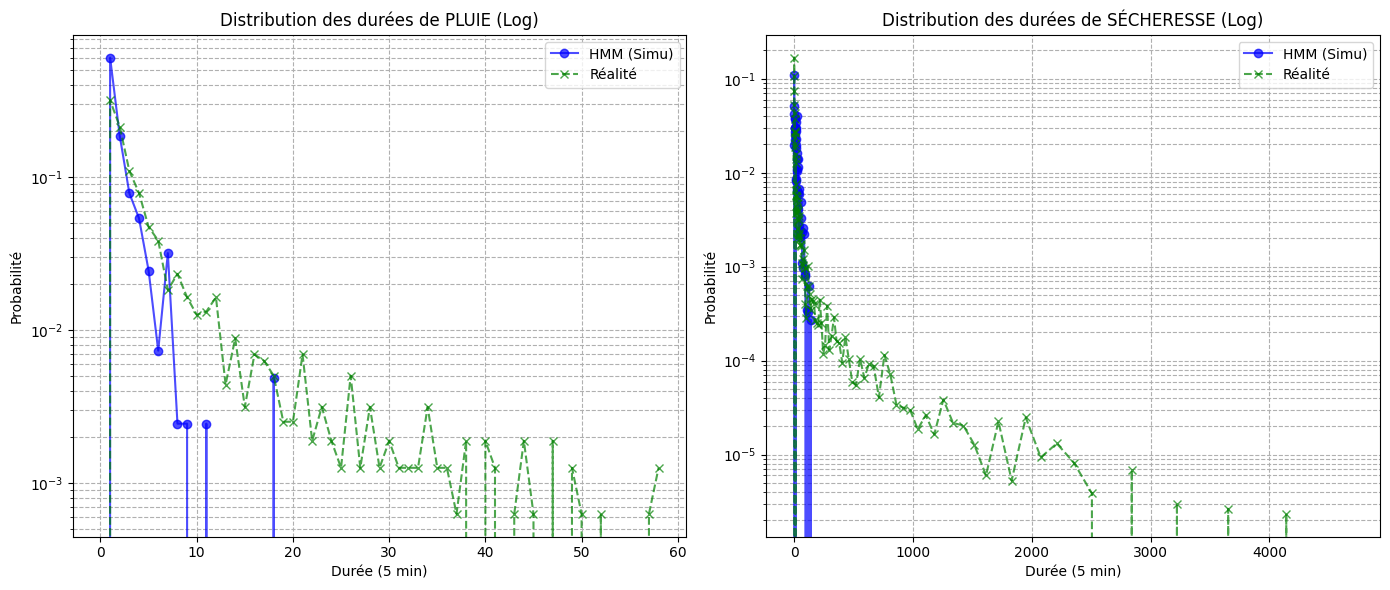

In [ ]:
# --- Question 2 : Simulation HMM et Comparaison (Avec Graphiques) ---
import os
import sys
import numpy as np
import scipy.io.matlab as mio
import matplotlib.pyplot as plt  # Ajout de matplotlib
from pomegranate import DiscreteDistribution, HiddenMarkovModel, State

# --- 1. GESTION DES CHEMINS ET IMPORTATION ---
subfolder = "Exercices 1 et 2"
current_dir = os.getcwd()
path_to_subfolder = os.path.join(current_dir, subfolder)

if path_to_subfolder not in sys.path:
    sys.path.append(path_to_subfolder)

try:
    from duree import duree
except ImportError:
    print(f"ATTENTION : Impossible d'importer 'duree' depuis {path_to_subfolder}")

# --- 2. DÉFINITION DU MODÈLE HMM ---
T = [[0.9, 0.1, 0.0], [0.5, 0.4, 0.1], [0.0, 0.35, 0.65]]
d0 = DiscreteDistribution({0: 1.0, 1: 0.0})
d1 = DiscreteDistribution({0: 0.8, 1: 0.2})
d2 = DiscreteDistribution({0: 0.0, 1: 1.0})

s0 = State(d0, name="Clear")
s1 = State(d1, name="Cloudy")
s2 = State(d2, name="V.Cloudy")

hmm = HiddenMarkovModel("Meteo_HMM")
hmm.add_states(s0, s1, s2)
hmm.add_transition(hmm.start, s0, 0.5)
hmm.add_transition(hmm.start, s1, 0.4)
hmm.add_transition(hmm.start, s2, 0.1)

states_list = [s0, s1, s2]
for i in range(3):
    for j in range(3):
        if T[i][j] > 0:
            hmm.add_transition(states_list[i], states_list[j], T[i][j])
hmm.bake()

# --- 3. GÉNÉRATION ---
Nsamples = 10000
obsSeq, _ = hmm.sample(length=Nsamples, path=True)
obsSeq = np.array(obsSeq, dtype=object).squeeze()

# --- 4. CHARGEMENT ET ANALYSE ROBUSTE ---
mat_file_path = os.path.join(path_to_subfolder, 'RR5MN.mat')

try:
    data = mio.loadmat(mat_file_path)
    ObsMesure = data['Support'].astype(np.int8).squeeze() - 1
    print(f"Données réelles chargées : {len(ObsMesure)} points.")
    
    # MODIFICATION ICI : On récupère tout (pdf et bins) pour les graphiques
    dSecReel, dPluieReel, pdfSecReel, pdfPluieReel, binsSecReel, binsPluieReel = duree(ObsMesure)
    Prop_Pluie_Reel = np.mean(ObsMesure == 1)
    
except (FileNotFoundError, Exception) as e:
    print(f"ATTENTION : Erreur ({e}). Utilisation de données vides.")
    ObsMesure = np.zeros(100)
    dSecReel, dPluieReel = [], []
    pdfSecReel, pdfPluieReel, binsSecReel, binsPluieReel = [], [], [], []
    Prop_Pluie_Reel = 0.0

# --- 5. CALCULS SIMULATION ---
try:
    # MODIFICATION ICI : On récupère tout pour le HMM aussi
    dSecHMM, dPluieHMM, pdfSecHMM, pdfPluieHMM, binsSecHMM, binsPluieHMM = duree(obsSeq)
    Prop_Pluie_HMM = np.mean(obsSeq == 1)
except:
    dSecHMM, dPluieHMM = [], []
    pdfSecHMM, pdfPluieHMM, binsSecHMM, binsPluieHMM = [], [], [], []
    Prop_Pluie_HMM = 0.0

# Fonction stats
def get_stats(data_array):
    if len(data_array) == 0: return 0.0, 0.0
    arr = np.array(data_array)
    return np.mean(arr), np.var(arr)

E_Pluie_HMM, V_Pluie_HMM = get_stats(dPluieHMM)
E_Pluie_Reel, V_Pluie_Reel = get_stats(dPluieReel)
E_Sec_HMM, V_Sec_HMM = get_stats(dSecHMM)
E_Sec_Reel, V_Sec_Reel = get_stats(dSecReel)

# --- 6. AFFICHAGE TABLEAU ---
print("\n" + "="*70)
print("RÉSULTATS Q2 : COMPARAISON HMM vs RÉALITÉ")
print("="*70)
print(f"{'Métrique':<25} | {'HMM (Simu)':<15} | {'Réalité':<15}")
print("-" * 70)
print(f"{'% Global Pluie':<25} | {Prop_Pluie_HMM*100:<14.2f}% | {Prop_Pluie_Reel*100:<14.2f}%")
print("-" * 70)
print(f"{'Pluie - Moyenne E[D]':<25} | {E_Pluie_HMM:<15.3f} | {E_Pluie_Reel:<15.3f}")
print(f"{'Pluie - Variance V[D]':<25} | {V_Pluie_HMM:<15.3f} | {V_Pluie_Reel:<15.3f}")
print("-" * 70)
print(f"{'Sec - Moyenne E[D]':<25} | {E_Sec_HMM:<15.3f} | {E_Sec_Reel:<15.3f}")
print(f"{'Sec - Variance V[D]':<25} | {V_Sec_HMM:<15.3f} | {V_Sec_Reel:<15.3f}")
print("="*70)

# --- 7. GRAPHIQUES (NOUVEAU) ---
plt.figure(figsize=(14, 6))

# Graphique 1 : Durées de Pluie
plt.subplot(1, 2, 1)
if len(binsPluieHMM) > 1:
    plt.semilogy(binsPluieHMM[:-1], pdfPluieHMM, 'b-o', label='HMM (Simu)', alpha=0.7)
if len(binsPluieReel) > 1:
    plt.semilogy(binsPluieReel[:-1], pdfPluieReel, 'g--x', label='Réalité', alpha=0.7)
plt.title("Distribution des durées de PLUIE (Log)")
plt.xlabel("Durée (5 min)")
plt.ylabel("Probabilité")
plt.legend()
plt.grid(True, which="both", ls="--")

# Graphique 2 : Durées de Sécheresse
plt.subplot(1, 2, 2)
if len(binsSecHMM) > 1:
    plt.semilogy(binsSecHMM[:-1], pdfSecHMM, 'b-o', label='HMM (Simu)', alpha=0.7)
if len(binsSecReel) > 1:
    plt.semilogy(binsSecReel[:-1], pdfSecReel, 'g--x', label='Réalité', alpha=0.7)
plt.title("Distribution des durées de SÉCHERESSE (Log)")
plt.xlabel("Durée (5 min)")
plt.ylabel("Probabilité")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import scipy.io.matlab as mio
from pomegranate import DiscreteDistribution, HiddenMarkovModel, State

# 1. CHARGEMENT ET PRÉPARATION
subfolder = "Exercices 1 et 2"
current_dir = os.getcwd()
mat_file_path = os.path.join(current_dir, subfolder, 'RR5MN.mat')

try:
    data = mio.loadmat(mat_file_path)
    ObsMesure = data['Support'].astype(np.int8).squeeze() - 1
    print(f"Données chargées : {len(ObsMesure)} points.")
except:
    print("ERREUR : Données introuvables.")
    ObsMesure = np.array([])

# Réinitialisation du modèle (Paramètres initiaux)
T = [[0.9, 0.1, 0.0], [0.5, 0.4, 0.1], [0.0, 0.35, 0.65]]
d0 = DiscreteDistribution({0: 1.0, 1: 0.0})
d1 = DiscreteDistribution({0: 0.8, 1: 0.2})
d2 = DiscreteDistribution({0: 0.0, 1: 1.0})
s0 = State(d0, name="Clear")
s1 = State(d1, name="Cloudy")
s2 = State(d2, name="V.Cloudy")

model = HiddenMarkovModel("Meteo_HMM")
model.add_states(s0, s1, s2)
model.add_transition(model.start, s0, 0.5)
model.add_transition(model.start, s1, 0.4)
model.add_transition(model.start, s2, 0.1)
states_list = [s0, s1, s2]
for i in range(3):
    for j in range(3):
        if T[i][j] > 0:
            model.add_transition(states_list[i], states_list[j], T[i][j])
model.bake()

# 2. APPRENTISSAGE (FIT)
if len(ObsMesure) > 0:
    limit = min(100000, len(ObsMesure))
    data_train = ObsMesure[:limit].astype('int32')
    # IMPORTANT : X doit être une liste de tableaux [ array([0,1...]) ]
    X = [data_train] 
    
    print(f"\n--- Lancement de l'apprentissage (fit) sur {limit} points ---")
    print("Calcul en cours... (Patientez quelques secondes)")
    
    model.fit(X)
    
    # Hack pour fins de chaînes
    try:
        for i in range(3): model.ends[i] = -46.0
    except: pass

    print("Apprentissage terminé !")

    # 3. AFFICHAGE ROBUSTE DES RÉSULTATS
    print("\n" + "="*60)
    print("RÉSULTATS QUESTION 3 : NOUVEAUX PARAMÈTRES APPRIS")
    print("="*60)

    # On récupère la matrice complète (inclus start/end)
    full_matrix = model.dense_transition_matrix()
    
    # On crée un dictionnaire pour trouver l'index de chaque état par son nom
    name_to_idx = {s.name: i for i, s in enumerate(model.states)}
    target_names = ['Clear', 'Cloudy', 'V.Cloudy']

    # A. Nouvelle Matrice de Transition (T)
    print("\n1. Nouvelle Matrice de Transition (T) :")
    print(f"{'De':<10} | {'Vers Clear':<12} | {'Vers Cloudy':<12} | {'Vers V.Cloudy':<12}")
    print("-" * 55)
    
    for src_name in target_names:
        row_str = f"{src_name:<10} |"
        if src_name in name_to_idx:
            src_i = name_to_idx[src_name]
            
            # On récupère les probas vers les 3 états cibles
            probs = []
            for dst_name in target_names:
                if dst_name in name_to_idx:
                    dst_i = name_to_idx[dst_name]
                    probs.append(full_matrix[src_i, dst_i])
                else:
                    probs.append(0.0)
            
            # Affichage
            for p in probs:
                row_str += f" {p:<12.4f} |"
        print(row_str)

    # B. Nouvelle Matrice d'Émission (B)
    print("\n2. Nouvelle Matrice d'Émission (B) :")
    print(f"{'État':<10} | {'P(Sec / 0)':<12} | {'P(Pluie / 1)':<12}")
    print("-" * 40)
    
    for name in target_names:
        if name in name_to_idx:
            state = model.states[name_to_idx[name]]
            try:
                # Gestion robuste des paramètres (dict ou list de dict)
                params = state.distribution.parameters
                if isinstance(params, list): params = params[0]
                
                p_sec = params.get(0, 0.0)
                p_pluie = params.get(1, 0.0)
                print(f"{name:<10} | {p_sec:<12.4f} | {p_pluie:<12.4f}")
            except:
                print(f"{name:<10} | {'Erreur':<12} | {'Erreur':<12}")
else:
    print("Pas de données pour l'apprentissage.")

Données chargées : 219168 points.

--- Lancement de l'apprentissage (fit) sur 100000 points ---
Calcul en cours... (Patientez quelques secondes)
Apprentissage terminé !

RÉSULTATS QUESTION 3 : NOUVEAUX PARAMÈTRES APPRIS

1. Nouvelle Matrice de Transition (T) :
De         | Vers Clear   | Vers Cloudy  | Vers V.Cloudy
-------------------------------------------------------
Clear      | 0.9964       | 0.0036       | 0.0000       |
Cloudy     | 0.0438       | 0.8720       | 0.0843       |
V.Cloudy   | 0.0000       | 0.1309       | 0.8691       |

2. Nouvelle Matrice d'Émission (B) :
État       | P(Sec / 0)   | P(Pluie / 1)
----------------------------------------
Clear      | 1.0000       | 0.0000      
Cloudy     | 0.9675       | 0.0325      
V.Cloudy   | 0.0000       | 1.0000      


C:\Users\tangu\AppData\Local\Temp\ipykernel_29856\4032017646.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obsSeq_new, _ = model.sample(length=Nsamples, path=True)



RÉSULTATS : COMPARAISON (HMM APPRIS vs RÉALITÉ)
Métrique             | HMM Appris (Q4)      | Réalité             
-----------------------------------------------------------------
% Pluie Global       | 5.36               % | 4.19               %
-----------------------------------------------------------------
Pluie - Moyenne      | 6.33                 | 5.76                
Pluie - Variance     | 48.57                | 108.28              
-----------------------------------------------------------------
Sec - Moyenne        | 111.70               | 124.72              
Sec - Variance       | 65777.36             | 195978.05           


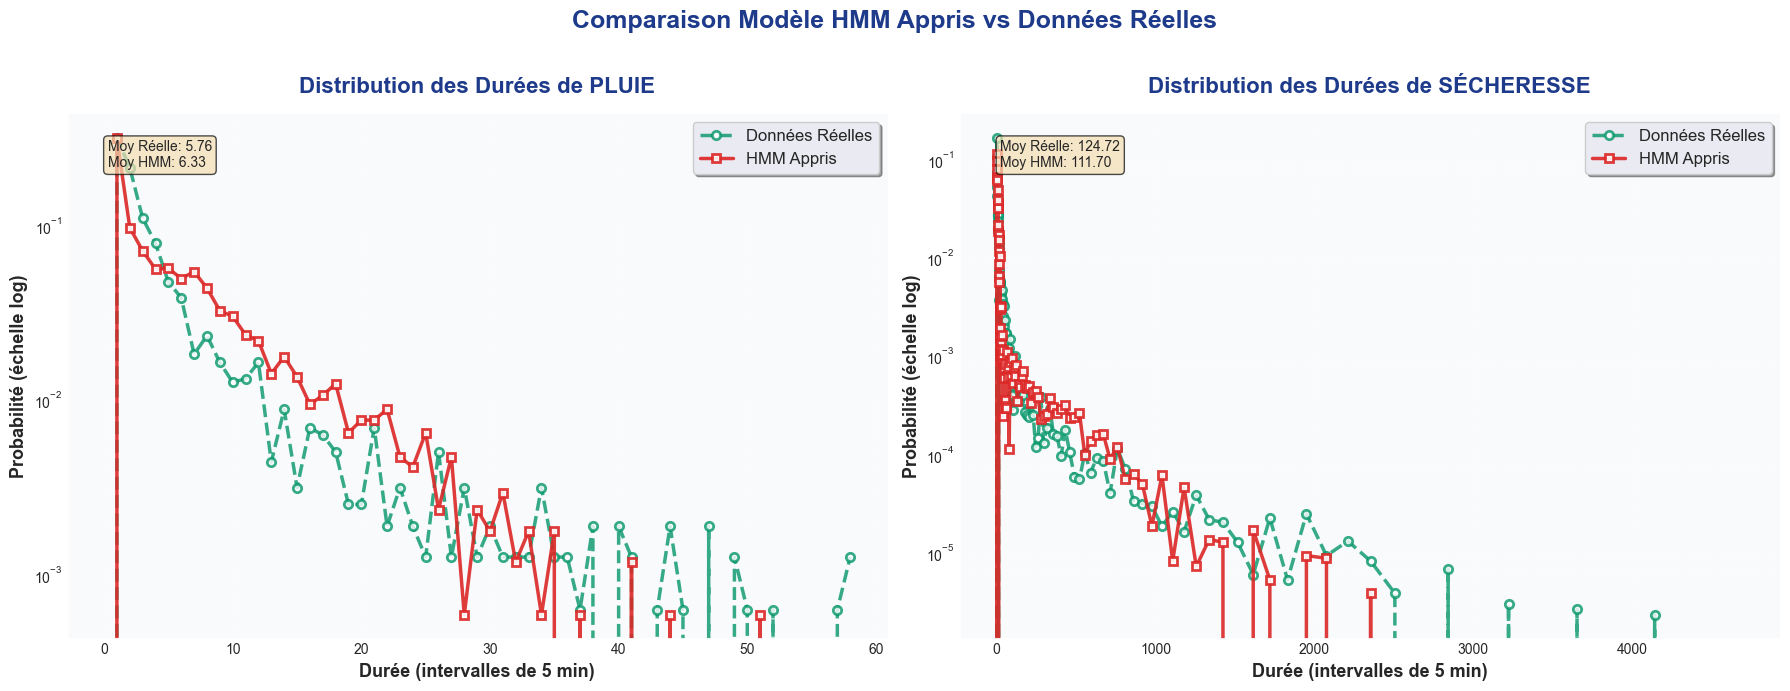

In [ ]:
# --- Question 4 : Simulation avec le modèle appris et Conclusion ---

# 1. GÉNÉRATION D'UNE NOUVELLE SÉQUENCE (Modèle Appris)
Nsamples = 200000
obsSeq_new, _ = model.sample(length=Nsamples, path=True)
obsSeq_new = np.array(obsSeq_new, dtype=object).squeeze()

# 2. ANALYSE DES STATISTIQUES
try:
    # Calculs sur la nouvelle simulation
    dSecNew, dPluieNew, pdfSecNew, pdfPluieNew, binsSecNew, binsPluieNew = duree(obsSeq_new)
    Prop_Pluie_New = np.mean(obsSeq_new == 1)
    
    # Rappel des stats réelles (déjà calculées, mais on sécurise)
    if 'dPluieReel' not in locals() or len(dPluieReel) == 0:
        # Re-calcul si nécessaire
        dSecReel, dPluieReel, pdfSecReel, pdfPluieReel, binsSecReel, binsPluieReel = duree(ObsMesure)
        Prop_Pluie_Reel = np.mean(ObsMesure == 1)

    # Fonction utilitaire stats
    def get_stats_str(data):
        if len(data) == 0: return "0.0", "0.0"
        return f"{np.mean(data):.2f}", f"{np.var(data):.2f}"

    # Récupération des valeurs
    m_pluie_new, v_pluie_new = get_stats_str(dPluieNew)
    m_sec_new, v_sec_new = get_stats_str(dSecNew)
    
    m_pluie_reel, v_pluie_reel = get_stats_str(dPluieReel)
    m_sec_reel, v_sec_reel = get_stats_str(dSecReel)

# 3. TABLEAU COMPARATIF FINAL
    print("\n" + "="*65)
    print("RÉSULTATS : COMPARAISON (HMM APPRIS vs RÉALITÉ)")
    print("="*65)
    print(f"{'Métrique':<20} | {'HMM Appris (Q4)':<20} | {'Réalité':<20}")
    print("-" * 65)
    print(f"{'% Pluie Global':<20} | {Prop_Pluie_New*100:<19.2f}% | {Prop_Pluie_Reel*100:<19.2f}%")
    print("-" * 65)
    print(f"{'Pluie - Moyenne':<20} | {m_pluie_new:<20} | {m_pluie_reel:<20}")
    print(f"{'Pluie - Variance':<20} | {v_pluie_new:<20} | {v_pluie_reel:<20}")
    print("-" * 65)
    print(f"{'Sec - Moyenne':<20} | {m_sec_new:<20} | {m_sec_reel:<20}")
    print(f"{'Sec - Variance':<20} | {v_sec_new:<20} | {v_sec_reel:<20}")
    print("="*65)

    # 4. GRAPHIQUES COMPARATIFS AMÉLIORÉS
    fig, axes = plt.subplots(1, 2, figsize=(18, 7), facecolor='white')
    
    # Style général
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # PLUIE
    ax1 = axes[0]
    ax1.semilogy(binsPluieReel[:-1], pdfPluieReel, 
                 color='#059669', linestyle='--', marker='o', 
                 markersize=6, linewidth=2.5, label='Données Réelles',
                 alpha=0.8, markerfacecolor='white', markeredgewidth=2)
    
    ax1.semilogy(binsPluieNew[:-1], pdfPluieNew, 
                 color='#DC2626', linestyle='-', marker='s', 
                 markersize=6, linewidth=2.5, label='HMM Appris',
                 alpha=0.9, markerfacecolor='white', markeredgewidth=2)
    
    ax1.set_title("Distribution des Durées de PLUIE", 
                  fontsize=16, fontweight='bold', pad=15, color='#1E3A8A')
    ax1.set_xlabel("Durée (intervalles de 5 min)", fontsize=13, fontweight='bold')
    ax1.set_ylabel("Probabilité (échelle log)", fontsize=13, fontweight='bold')
    ax1.legend(loc='upper right', fontsize=12, frameon=True, 
               shadow=True, fancybox=True)
    ax1.grid(True, which="both", linestyle=":", alpha=0.4, linewidth=1)
    ax1.set_facecolor('#F8FAFC')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    
    # Annotation
    ax1.text(0.05, 0.95, f'Moy Réelle: {m_pluie_reel}\nMoy HMM: {m_pluie_new}',
             transform=ax1.transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    # SÉCHERESSE
    ax2 = axes[1]
    ax2.semilogy(binsSecReel[:-1], pdfSecReel, 
                 color='#059669', linestyle='--', marker='o', 
                 markersize=6, linewidth=2.5, label='Données Réelles',
                 alpha=0.8, markerfacecolor='white', markeredgewidth=2)
    
    ax2.semilogy(binsSecNew[:-1], pdfSecNew, 
                 color='#DC2626', linestyle='-', marker='s', 
                 markersize=6, linewidth=2.5, label='HMM Appris',
                 alpha=0.9, markerfacecolor='white', markeredgewidth=2)
    
    ax2.set_title("Distribution des Durées de SÉCHERESSE", 
                  fontsize=16, fontweight='bold', pad=15, color='#1E3A8A')
    ax2.set_xlabel("Durée (intervalles de 5 min)", fontsize=13, fontweight='bold')
    ax2.set_ylabel("Probabilité (échelle log)", fontsize=13, fontweight='bold')
    ax2.legend(loc='upper right', fontsize=12, frameon=True, 
               shadow=True, fancybox=True)
    ax2.grid(True, which="both", linestyle=":", alpha=0.4, linewidth=1)
    ax2.set_facecolor('#F8FAFC')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(2)
    ax2.spines['bottom'].set_linewidth(2)
    
    # Annotation
    ax2.text(0.05, 0.95, f'Moy Réelle: {m_sec_reel}\nMoy HMM: {m_sec_new}',
             transform=ax2.transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    # Titre général
    fig.suptitle('Comparaison Modèle HMM Appris vs Données Réelles', 
                 fontsize=18, fontweight='bold', y=0.98, color='#1E3A8A')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

except Exception as e:
    print(f"Erreur lors de l'analyse : {e}")